<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="https://bokeh.org/">
           <img
               src="assets/bokeh-transparent.png"
               style="width:50px"
           >
           </a>
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
</table>

<div style="float:right;"><h2>13 Exporting and embedding</h2></div>

So far, you have used generate interactive Bokeh output directly in Jupyter notebooks.

You can also use Bokeh to generate standalone HTML files, or embed Bokeh documents in
other contexts.
Bokeh also supports export to SVG and PNG files.

### Standalone HTML files

Bokeh allows you to save a document as a standalone HTML file.
This is useful for sharing your work with others, or for embedding in a web site.
The HTML document that Bokeh creates includes all the data and JavaScript code for
your document.

By default, most of Bokeh's JavaScript components still need to be loaded from the
Content Delivery Network (CDN). This means that the HTML file will not work offline.

Creating a standalone HTML file is a two-step process:
- First, you use the `output_file()` function to specify some file-related options:
    - `filename` is the name of the HTML file to generate
    - `title` is the title of the HTML document
    - `mode` specifies how BokehJS should be included in the HTML file.
        By default, BokehJS will be loaded from the Content Delivery Network (CDN).
        This means that the HTML file will not work offline.
        To include BokehJS in the HTML file, set `mode` to `"inline"`.
- Second, you use either `show()` or `save()` to generate the HTML file:
    - `save()` will save the HTML file to disk
    - `show()` will save the HTML file and open it in a new browser tab

Run the following code cell to generate a standalone HTML file:

In [1]:
from bokeh.plotting import figure, output_file, save

# prepare some data
x = [1, 2, 3, 4, 5]
y = [4, 5, 5, 7, 2]

# set output to static HTML file
output_file(filename="custom_filename.html", title="Static HTML file")

# create a new plot
p = figure(sizing_mode="stretch_width", height=250)

# add a circle renderer
circle = p.circle(x, y, fill_color="red", size=15)

# save the results to a file
# 🔁 replace with show(p) to see the HTML file opened in a browser window
save(p)

'c:\\Users\\TCM\\Documents\\GitHub\\tutorial\\notebooks\\custom_filename.html'

It is important to note that `output_file` initiates a *persistent mode of operation*. That is, all subsequent calls to show will generate output to the specified file. We can "reset" where output will go by calling `reset_output`:

Calling `output_file` switches Bokeh to file output mode persistently.
This means that all subsequent calls to `show` will generate output to the specified file.

To reset the output mode, call `reset_output`:

In [2]:
from bokeh.io import reset_output

reset_output()

Since you are currently running Bokeh in a Jupyter notebook, you can also use the
`output_notebook()` function. This switch Bokeh back to notebook output mode.

In [4]:
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

### Embedding Bokeh documents

Using the `output_file()` function creates a file that contains nothing but the Bokeh
document.
However, you can also embed Bokeh documents as an element of a larger web page.
This way, you can include Bokeh in an Jinja template, for example.

One way to do this is to use the `components()` function.
This function returns a tuple containing two elements:
* The first element is a `script` element that contains the JavaScript code for the
    Bokeh document.
* The second element is a `div` element that contains the HTML code for the Bokeh
    document.

You can then use these elements in your own HTML code.

The following code cell shows how to use the `components()` function:

In [5]:
# from bokeh.plotting import figure
from bokeh.embed import components

plot = figure()
plot.circle([1, 2], [3, 4])

script, div = components(plot)

This is the script generated by this example:

In [6]:
script

'    <script type="text/javascript">\n        (function() {\n  const fn = function() {\n    Bokeh.safely(function() {\n      (function(root) {\n        function embed_document(root) {\n        const docs_json = \'{"7d8bce51-e834-48af-95b9-64d7fb48e0fb":{"version":"3.0.3","title":"Bokeh Application","defs":[],"roots":[{"type":"object","name":"Figure","id":"p1240","attributes":{"x_range":{"type":"object","name":"DataRange1d","id":"p1242"},"y_range":{"type":"object","name":"DataRange1d","id":"p1241"},"x_scale":{"type":"object","name":"LinearScale","id":"p1253"},"y_scale":{"type":"object","name":"LinearScale","id":"p1255"},"title":{"type":"object","name":"Title","id":"p1248"},"renderers":[{"type":"object","name":"GlyphRenderer","id":"p1292","attributes":{"data_source":{"type":"object","name":"ColumnDataSource","id":"p1286","attributes":{"selected":{"type":"object","name":"Selection","id":"p1288","attributes":{"indices":[],"line_indices":[]}},"selection_policy":{"type":"object","name":"Unio

And this is the div to embed in the HTML page:

In [7]:
div

'<div id="e839c050-2b9f-42cd-9c10-a87014ec5895" data-root-id="p1240" style="display: contents;"></div>'

There are several more options for exporting and embedding Bokeh documents.
See [Web pages](https://docs.bokeh.org/en/latest/docs/user_guide/output/embed.html)
in the user guide for more information.

### SVG and PNG export

In addition to storing visualizations in HTML, you can also export a Bokeh document as
an SVG or PNG file.

Before you can use these file export options, you need to install the `selenium` Python
package:

In [8]:
!pip install selenium

See [Additional dependencies](https://docs.bokeh.org/en/latest/docs/user_guide/output/export.html#additional-dependencies)
in the user guide for more details and options.

After installing selenium, you can use the `export_png()` function:

In [16]:
from bokeh.io import export_png

p = figure(width=300, height=300)
circle = p.circle([1, 2, 3], [2, 5, 4])

# save the results to a file
export_png(p, filename="plot.png")

'c:\\Users\\TCM\\Documents\\GitHub\\tutorial\\notebooks\\plot.png'

This is the resulting PNG file:

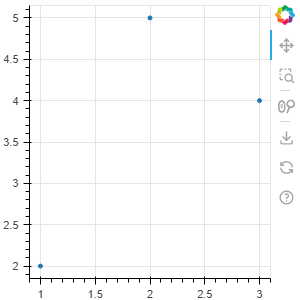

In [17]:
from IPython.display import display, Image

display(Image(filename=export_png(p)))

Similarly, you can also export a Bokeh document as an SVG file:

In [18]:
from bokeh.io import export_svg

export_svg(p, filename="plot.svg")

['plot.svg']

The resulting SVG looks like this:

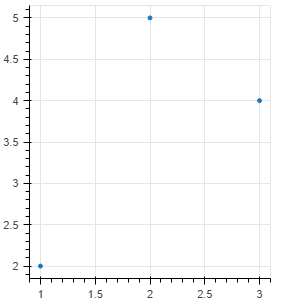

In [19]:
from IPython.display import SVG

display(SVG(filename=export_svg(p)[0]))

For more information about exporting to PNG and SVG, see
[PNG and SVG export](https://docs.bokeh.org/en/latest/docs/user_guide/output/export.html)
in the user guide.

# Next section

[TBD, placeholder]